In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols #For n-way ANOVA
from statsmodels.stats.anova import _get_covariance, anova_lm #for n-way ANOVA
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_laptop = pd.read_excel("Laptop_SM_Tourism.xlsx")

data_laptop.head().T

,0,1,2,3,4
UserID,1005882,1005884,1005886,1005889,1005907
Taken_product,No,No,No,No,Yes
Yearly_avg_view_on_travel_page,379,255,250,295,250
preferred_device,Laptop,Laptop,Laptop,Laptop,Laptop
total_likes_on_outstation_checkin_given,9776,48725,35184,7572,39379
yearly_avg_Outstation_checkins,8,3,2,23,16
member_in_family,1,4,2,3,1
preferred_location_type,Beach,Beach,Beach,Beach,Beach
Yearly_avg_comment_on_travel_page,64,59,84,48,80
total_likes_on_outofstation_checkin_received,5142,2913,3074,9532,3926


In [3]:
data_laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   UserID                                        1108 non-null   int64 
 1   Taken_product                                 1108 non-null   object
 2   Yearly_avg_view_on_travel_page                1108 non-null   int64 
 3   preferred_device                              1108 non-null   object
 4   total_likes_on_outstation_checkin_given       1108 non-null   int64 
 5   yearly_avg_Outstation_checkins                1108 non-null   int64 
 6   member_in_family                              1108 non-null   int64 
 7   preferred_location_type                       1108 non-null   object
 8   Yearly_avg_comment_on_travel_page             1108 non-null   int64 
 9   total_likes_on_outofstation_checkin_received  1108 non-null   int64 
 10  

In [4]:
data_laptop.shape

(1108, 17)

In [5]:
data_laptop.columns

Index(['UserID', 'Taken_product', 'Yearly_avg_view_on_travel_page',
       'preferred_device', 'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

In [6]:
dups = data_laptop.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [7]:
data_laptop = data_laptop.drop('UserID',axis=1)

In [8]:
data_laptop.head().T

,0,1,2,3,4
Taken_product,No,No,No,No,Yes
Yearly_avg_view_on_travel_page,379,255,250,295,250
preferred_device,Laptop,Laptop,Laptop,Laptop,Laptop
total_likes_on_outstation_checkin_given,9776,48725,35184,7572,39379
yearly_avg_Outstation_checkins,8,3,2,23,16
member_in_family,1,4,2,3,1
preferred_location_type,Beach,Beach,Beach,Beach,Beach
Yearly_avg_comment_on_travel_page,64,59,84,48,80
total_likes_on_outofstation_checkin_received,5142,2913,3074,9532,3926
week_since_last_outstation_checkin,1,1,0,0,1


In [9]:
data_laptop.describe().T

,count,mean,std,min,25%,50%,75%,max
Yearly_avg_view_on_travel_page,1108.0,282.130866,64.242174,138.0,237.00,270.5,325.00,463.0
total_likes_on_outstation_checkin_given,1108.0,27769.664260,13361.837042,3818.0,17650.25,26942.5,39380.25,52512.0
yearly_avg_Outstation_checkins,1108.0,9.277978,8.409913,1.0,2.00,7.0,15.00,29.0
member_in_family,1108.0,2.895307,1.044561,1.0,2.00,3.0,4.00,5.0
Yearly_avg_comment_on_travel_page,1108.0,77.496390,21.039323,33.0,60.00,77.0,95.00,125.0
total_likes_on_outofstation_checkin_received,1108.0,6226.317690,4365.994064,1098.0,2884.00,4759.5,7979.50,19905.0
week_since_last_outstation_checkin,1108.0,2.998195,2.493351,0.0,1.00,2.0,4.00,11.0
montly_avg_comment_on_company_page,1108.0,26.398917,6.187063,14.0,22.00,26.0,31.00,46.0
travelling_network_rating,1108.0,2.776173,1.078864,1.0,2.00,3.0,4.00,4.0
Adult_flag,1108.0,0.765343,0.828026,0.0,0.00,1.0,1.00,3.0


In [10]:
data_laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Taken_product                                 1108 non-null   object
 1   Yearly_avg_view_on_travel_page                1108 non-null   int64 
 2   preferred_device                              1108 non-null   object
 3   total_likes_on_outstation_checkin_given       1108 non-null   int64 
 4   yearly_avg_Outstation_checkins                1108 non-null   int64 
 5   member_in_family                              1108 non-null   int64 
 6   preferred_location_type                       1108 non-null   object
 7   Yearly_avg_comment_on_travel_page             1108 non-null   int64 
 8   total_likes_on_outofstation_checkin_received  1108 non-null   int64 
 9   week_since_last_outstation_checkin            1108 non-null   int64 
 10  

In [11]:
data_laptop.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [12]:
#Displaying unique values

for i in data_laptop.columns:
    if data_laptop[i].dtype == 'object':
        print(i)
        print(data_laptop[i].unique())
        print("\n")

Taken_product
['No' 'Yes']


preferred_device
['Laptop']


preferred_location_type
['Beach' 'Historical site' 'Big Cities' 'Trekking' 'Other' 'Hill Stations']


following_company_page
['No' 'Yes']


working_flag
['Yes' 'No']




In [14]:
#Encoding the data

data_laptop['following_company_page'] = data_laptop['following_company_page'].replace('Yes','1')
data_laptop['following_company_page'] = data_laptop['following_company_page'].replace('No','0')

In [15]:
data_laptop['Taken_product'] = data_laptop['Taken_product'].replace('Yes','1')
data_laptop['Taken_product'] = data_laptop['Taken_product'].replace('No','0')

In [16]:
data_laptop['working_flag'] = data_laptop['working_flag'].replace('Yes','1')
data_laptop['working_flag'] = data_laptop['working_flag'].replace('No','0')

In [17]:
#Changing certain columns into categorical

data_laptop['Adult_flag'] = pd.Categorical(data_laptop['Adult_flag'])
data_laptop['Taken_product'] = pd.Categorical(data_laptop['Taken_product'])
data_laptop['member_in_family'] = pd.Categorical(data_laptop['member_in_family'])
data_laptop['following_company_page'] = pd.Categorical(data_laptop['following_company_page'])
data_laptop['working_flag'] = pd.Categorical(data_laptop['working_flag'])
data_laptop['travelling_network_rating'] = pd.Categorical(data_laptop['travelling_network_rating'])

In [18]:
#Changing certain columns into int

data_laptop['yearly_avg_Outstation_checkins'] = data_laptop['yearly_avg_Outstation_checkins'].astype(int)

In [20]:
data_laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Taken_product                                 1108 non-null   category
 1   Yearly_avg_view_on_travel_page                1108 non-null   int64   
 2   preferred_device                              1108 non-null   object  
 3   total_likes_on_outstation_checkin_given       1108 non-null   int64   
 4   yearly_avg_Outstation_checkins                1108 non-null   int32   
 5   member_in_family                              1108 non-null   category
 6   preferred_location_type                       1108 non-null   object  
 7   Yearly_avg_comment_on_travel_page             1108 non-null   int64   
 8   total_likes_on_outofstation_checkin_received  1108 non-null   int64   
 9   week_since_last_outstation_checkin            1108 n

In [21]:
#Grouping numeric features in one frame : df_mobile_num
data_laptop_num = data_laptop.select_dtypes(include = ['float64', 'int64','int32'])
lstnumericcolumns = list(data_laptop_num.columns.values)
print('Number of numeric features : ',len(lstnumericcolumns))

#Grouping categorical features in one frame : df_mobile_cat
data_laptop_cat = data_laptop.select_dtypes(include=['object','category'])
lstcategoricalcolumns = list(data_laptop_cat.columns.values)
print('Number of categorical features : ',len(lstcategoricalcolumns))

Number of numeric features :  8
Number of categorical features :  8


In [22]:
data_laptop_num.columns

Index(['Yearly_avg_view_on_travel_page',
       'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin',
       'montly_avg_comment_on_company_page',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

In [23]:
data_laptop_cat.columns

Index(['Taken_product', 'preferred_device', 'member_in_family',
       'preferred_location_type', 'following_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag'],
      dtype='object')

Univariate Analysis

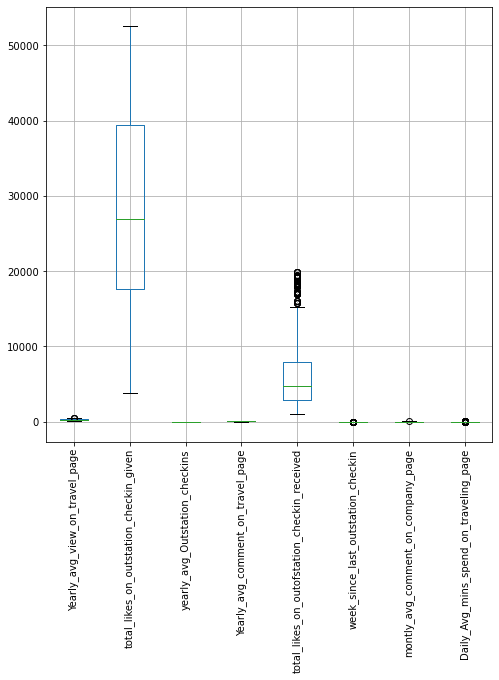

In [24]:
#Univariate Analysis : Boxplot

data_laptop_num.boxplot(figsize=(8,8))
plt.xticks(rotation=90)
plt.show()

In [25]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [26]:
for column in data_laptop_num.columns:
    lr,ur=remove_outlier(data_laptop_num[column])
    data_laptop_num[column]=np.where(data_laptop_num[column]>ur,ur,data_laptop_num[column])
    data_laptop_num[column]=np.where(data_laptop_num[column]<lr,lr,data_laptop_num[column])

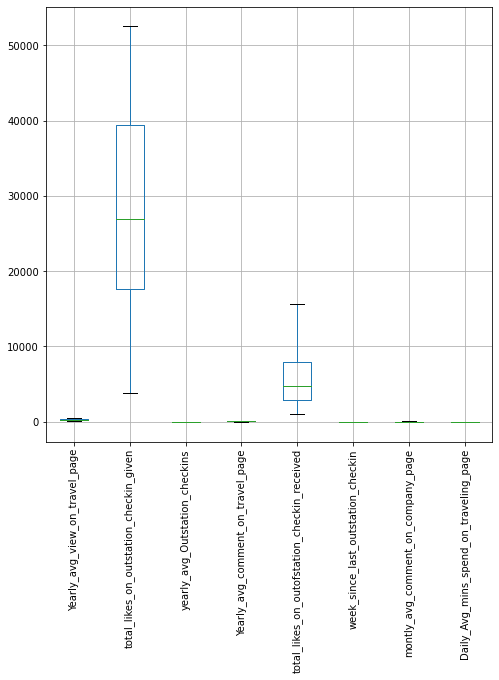

In [27]:
data_laptop_num.boxplot(figsize=(8,8))
plt.xticks(rotation=90)
plt.show()

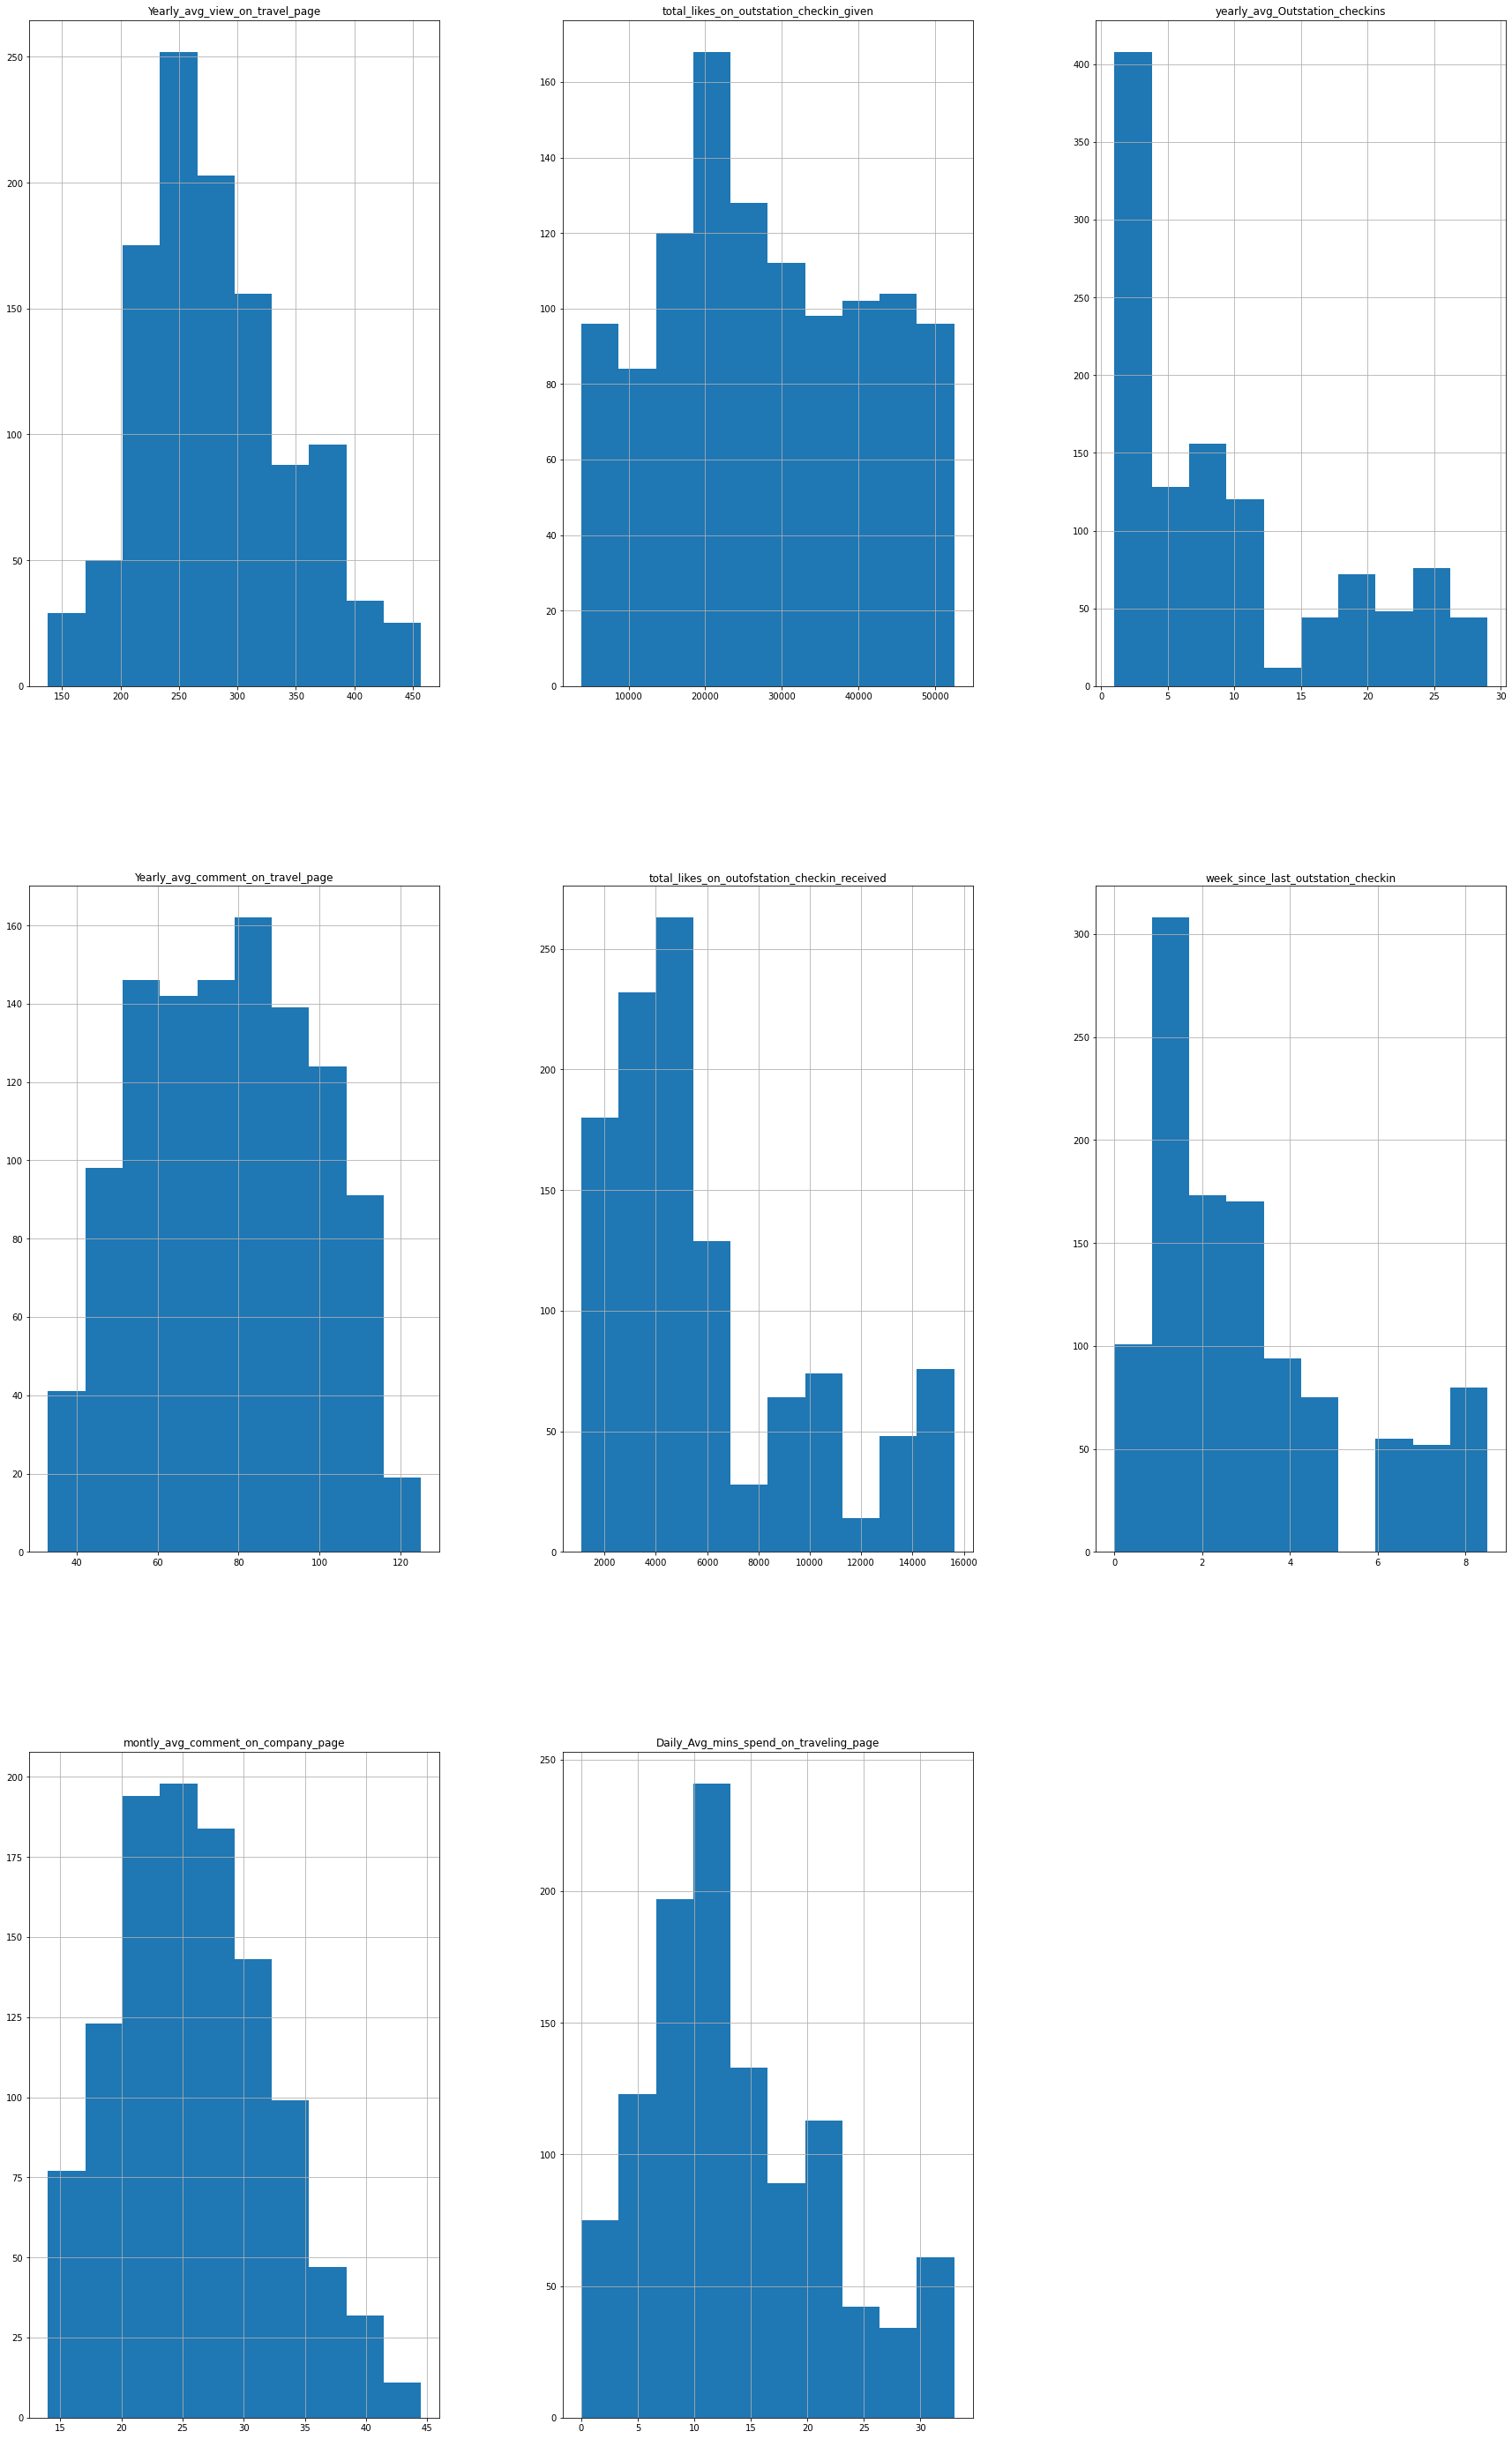

In [28]:
data_laptop_num.hist(column = data_laptop_num.columns, figsize=(30,50));

In [29]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(data_laptop_num.Yearly_avg_view_on_travel_page),stats.skew(data_laptop_num.total_likes_on_outstation_checkin_given),
                                       stats.skew(data_laptop_num.yearly_avg_Outstation_checkins),stats.skew(data_laptop_num.Yearly_avg_comment_on_travel_page),
                                       stats.skew(data_laptop_num.total_likes_on_outofstation_checkin_received),stats.skew(data_laptop_num.week_since_last_outstation_checkin),
                                       stats.skew(data_laptop_num.montly_avg_comment_on_company_page),
                                       stats.skew(data_laptop_num.Daily_Avg_mins_spend_on_traveling_page)]},
                        index=['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given', 
                               'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page', 
                               'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin',
                               'montly_avg_comment_on_company_page','Daily_Avg_mins_spend_on_traveling_page'])  

Skewness

,Skewness
Yearly_avg_view_on_travel_page,0.453403
total_likes_on_outstation_checkin_given,0.098337
yearly_avg_Outstation_checkins,0.899294
Yearly_avg_comment_on_travel_page,0.032428
total_likes_on_outofstation_checkin_received,1.121349
week_since_last_outstation_checkin,0.876264
montly_avg_comment_on_company_page,0.332114
Daily_Avg_mins_spend_on_traveling_page,0.723339


Categorical Variables

In [30]:
data_laptop_cat.columns

Index(['Taken_product', 'preferred_device', 'member_in_family',
       'preferred_location_type', 'following_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag'],
      dtype='object')

<AxesSubplot:xlabel='travelling_network_rating', ylabel='count'>

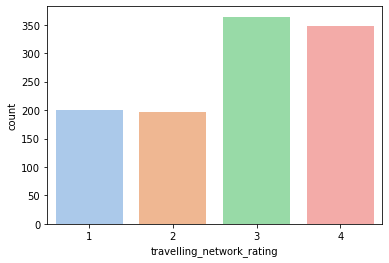

In [31]:
sns.countplot(x='travelling_network_rating', data=data_laptop_cat, palette='pastel')

<AxesSubplot:xlabel='Taken_product', ylabel='count'>

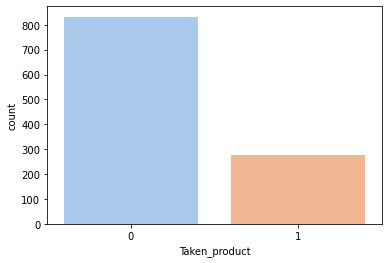

In [32]:
sns.countplot(x='Taken_product', data=data_laptop_cat, palette='pastel')

<AxesSubplot:xlabel='preferred_device', ylabel='count'>

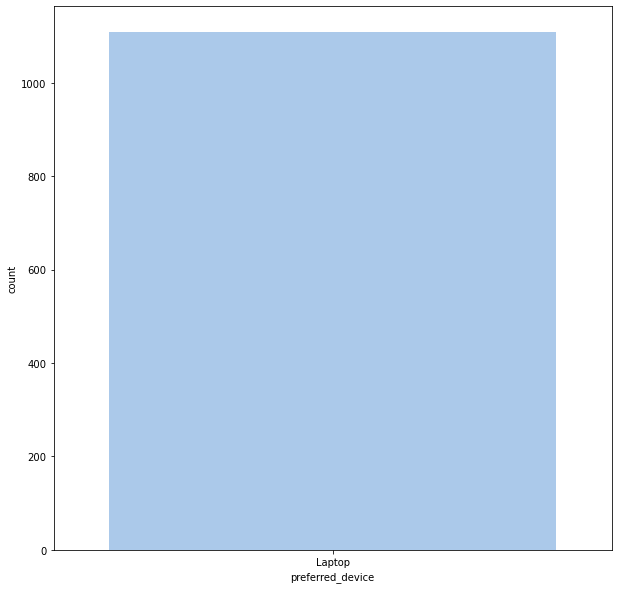

In [33]:
plt.figure(figsize = (10,10))
sns.countplot(x='preferred_device', data=data_laptop_cat, palette='pastel')

<AxesSubplot:xlabel='member_in_family', ylabel='count'>

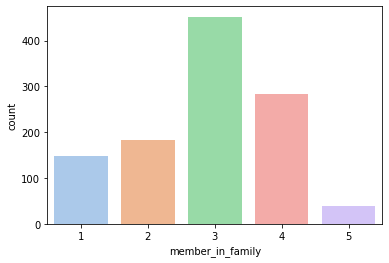

In [34]:
sns.countplot(x='member_in_family', data=data_laptop_cat, palette='pastel')

<AxesSubplot:xlabel='preferred_location_type', ylabel='count'>

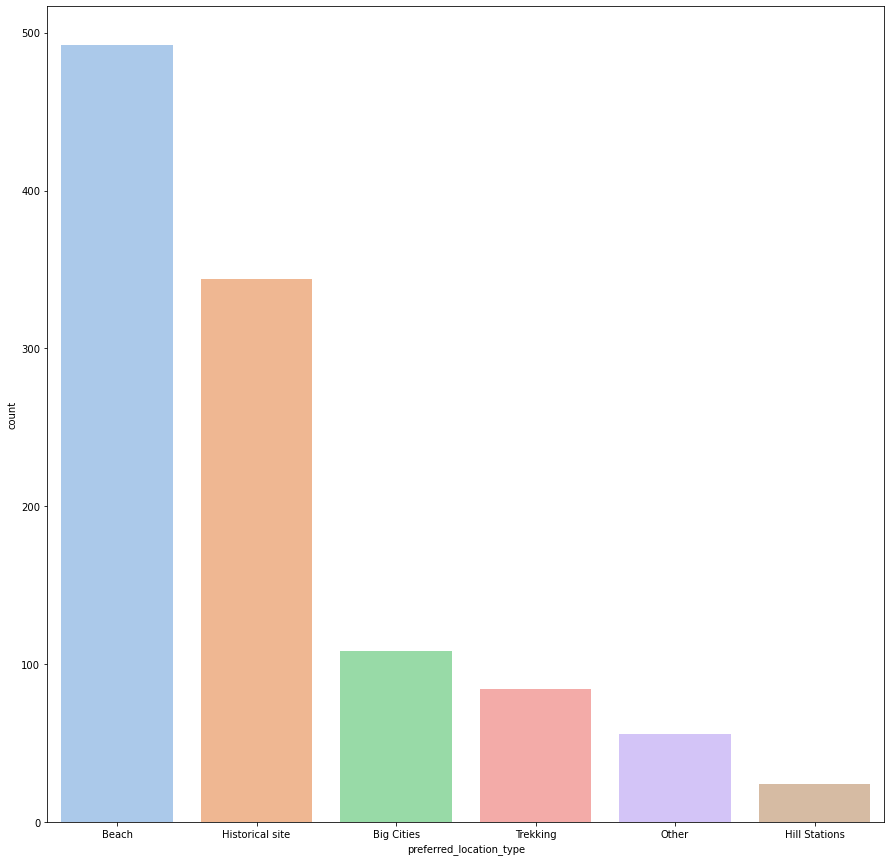

In [35]:
plt.figure(figsize = (15,15))
sns.countplot(x='preferred_location_type', data=data_laptop_cat, palette='pastel')

<AxesSubplot:xlabel='following_company_page', ylabel='count'>

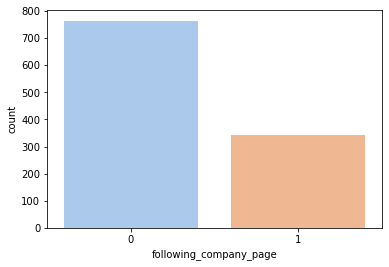

In [36]:
sns.countplot(x='following_company_page', data=data_laptop_cat, palette='pastel')

<AxesSubplot:xlabel='working_flag', ylabel='count'>

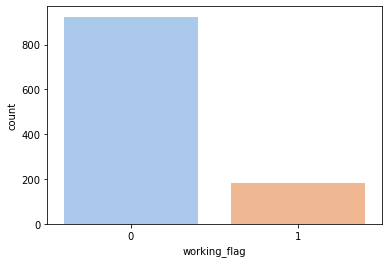

In [37]:
sns.countplot(x='working_flag', data=data_laptop_cat, palette='pastel')

<AxesSubplot:xlabel='Adult_flag', ylabel='count'>

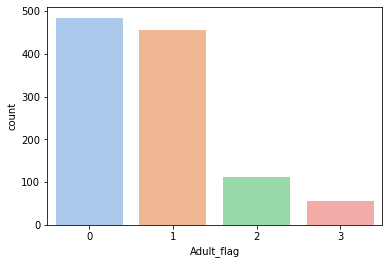

In [38]:
sns.countplot(x='Adult_flag', data=data_laptop_cat, palette='pastel')

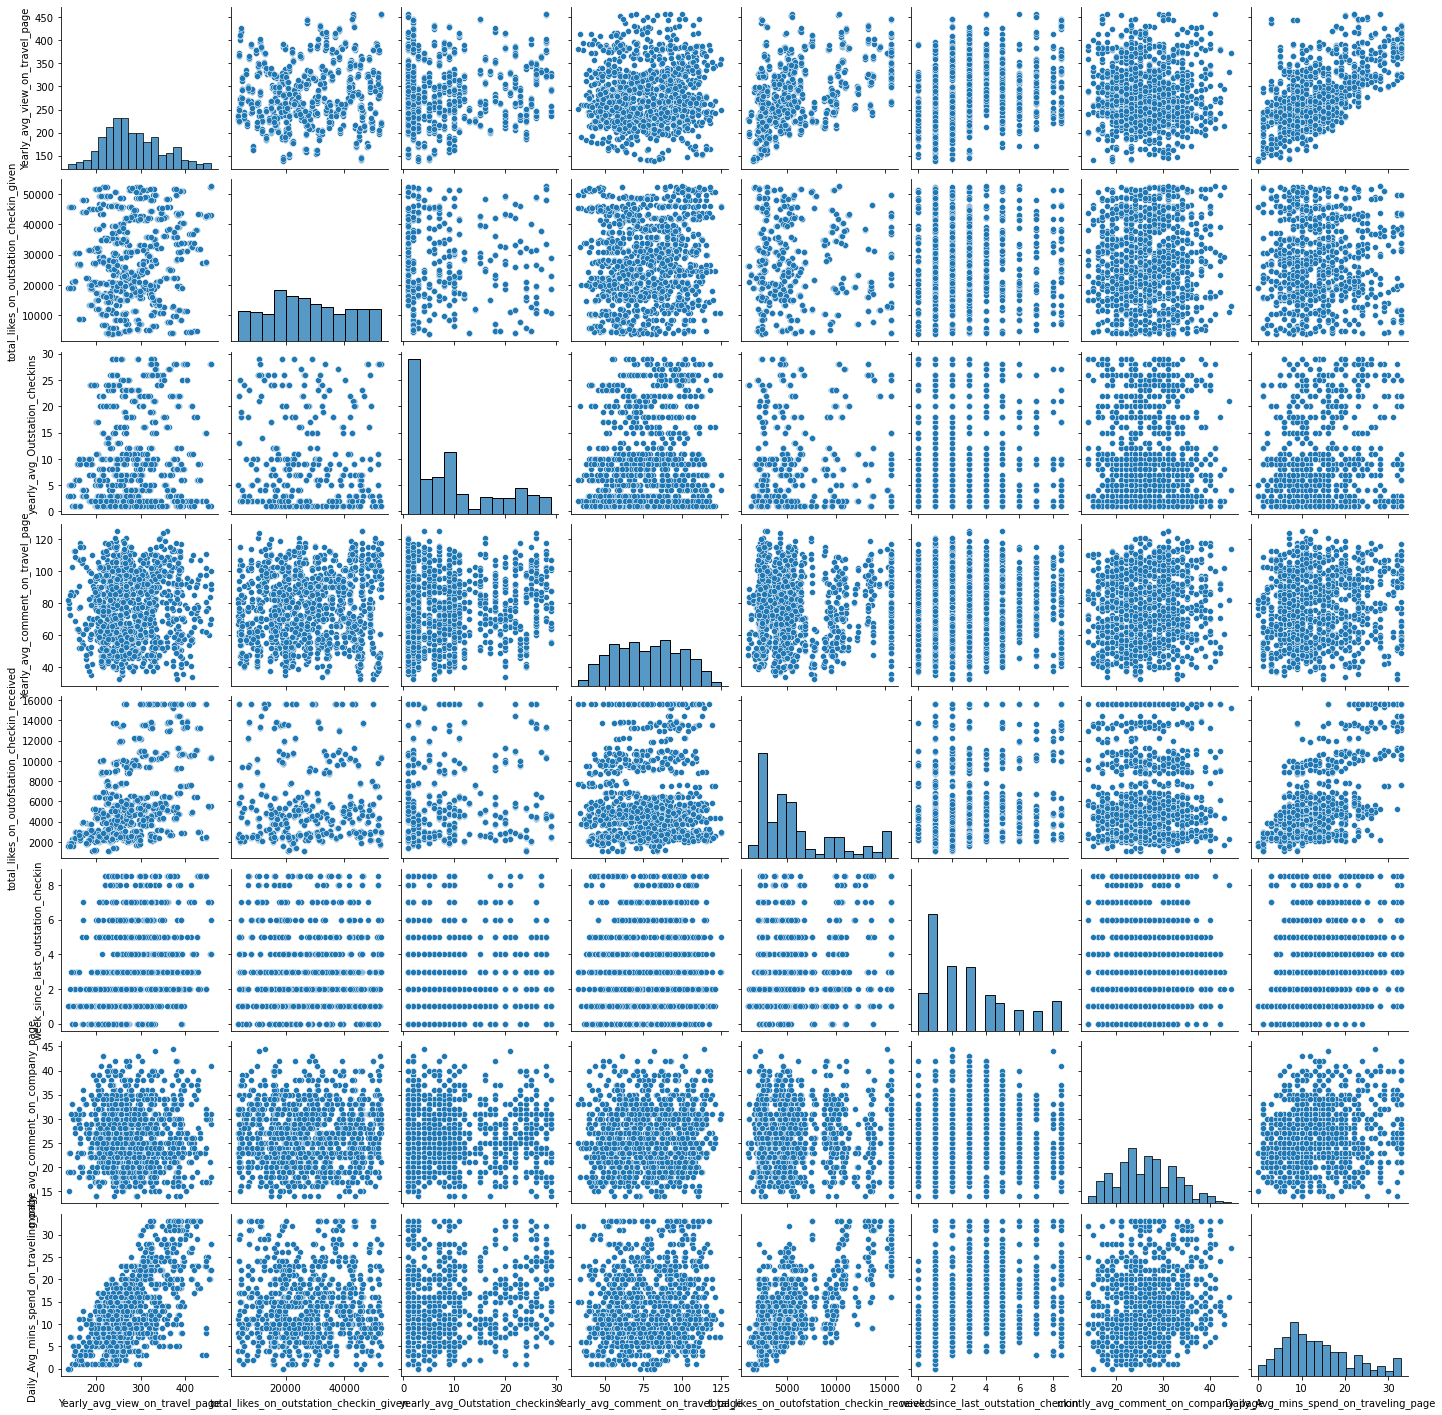

In [39]:
sns.pairplot(data_laptop_num)
plt.show()

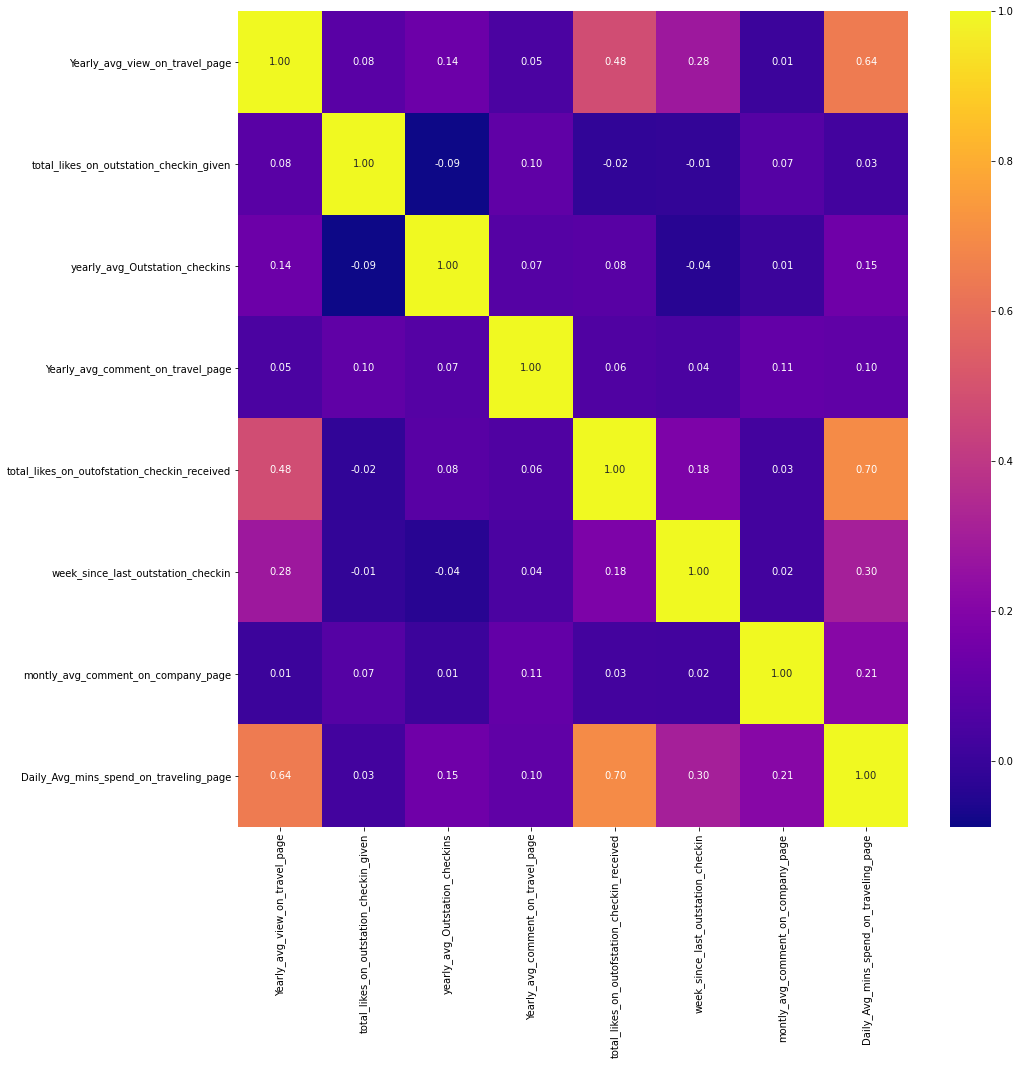

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(data_laptop_num.corr(),annot=True,fmt=".2f", cmap='plasma');